# Analisis univariante y bivariante

El set de datos de los precios de las viviendas de California puede considerarse como el "Hola mundo" del análisis de regresión en machine learning.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Leemos nuestro fichero de datos:

In [2]:
df = pd.read_feather('../data/03_model_input/california_housing_clean.ftr')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<pre>
:Attribute Information:
    - MedInc:       ingreso mediano en la zona
    - HouseAge:     edad mediana de las casas en la zona
    - AveRooms:     número promedio de habitaciones por hogar
    - AveBedrms:    número promedio de dormitorios por hogar
    - Population:   población de la zona
    - AveOccup:     número promedio de miembros del hogar
    - Latitude:     latitud de la zona
    - Longitude:    longitud de la zona
</pre>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19128 entries, 0 to 19127
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      19128 non-null  float64
 1   HouseAge    19128 non-null  float64
 2   AveRooms    19128 non-null  float64
 3   AveBedrms   19128 non-null  float64
 4   Population  19128 non-null  float64
 5   AveOccup    19128 non-null  float64
 6   Latitude    19128 non-null  float64
 7   Longitude   19128 non-null  float64
 8   target      19128 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


## Mostramos los datos a estimar

<Axes: xlabel='target', ylabel='Count'>

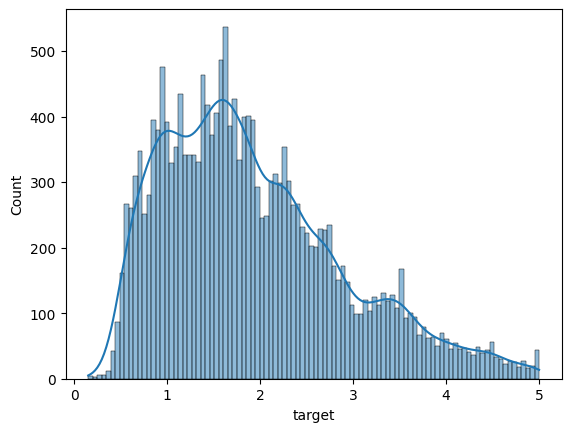

In [4]:
target = df['target']
sns.histplot(target, bins=100, kde=True)

### Analisis univariante

In [5]:
num_cols = df.select_dtypes(include="number").columns.tolist()
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,19128.0,3.667086,1.540468,0.499900,2.526775,3.450550,4.577575,15.000100
HouseAge,19128.0,28.625209,12.442811,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,19128.0,5.189416,1.123154,1.000000,4.408305,5.162897,5.927836,10.352941
AveBedrms,19128.0,1.061785,0.110299,0.333333,1.005025,1.047170,1.095613,3.099338
Population,19128.0,1429.377196,1061.452127,5.000000,806.000000,1183.000000,1738.000000,16305.000000
AveOccup,19128.0,2.935468,0.819692,0.970588,2.447562,2.837330,3.296437,33.952941
Latitude,19128.0,35.645933,2.143630,32.540000,33.930000,34.270000,37.720000,41.950000
Longitude,19128.0,-119.581095,2.003572,-124.350000,-121.790000,-118.510000,-118.010000,-114.550000
target,19128.0,1.927449,0.974130,0.149990,1.167000,1.745000,2.489000,5.000000


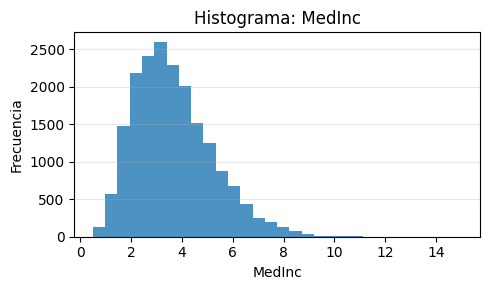

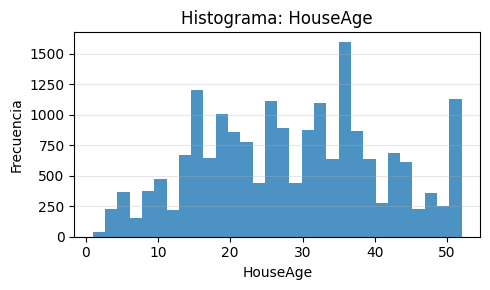

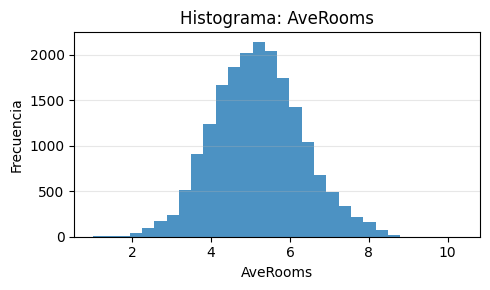

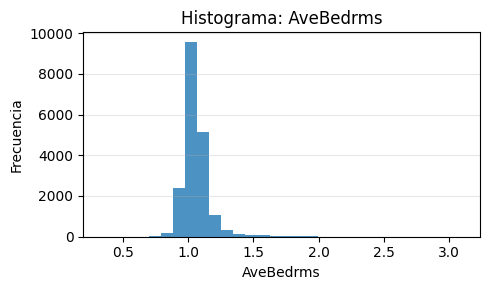

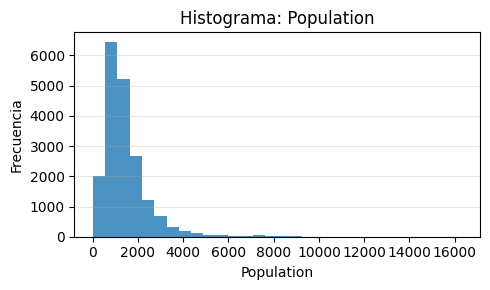

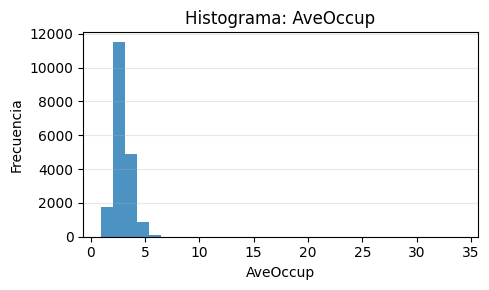

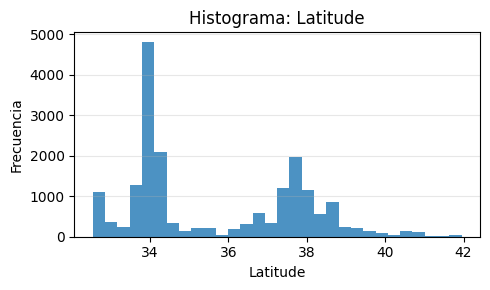

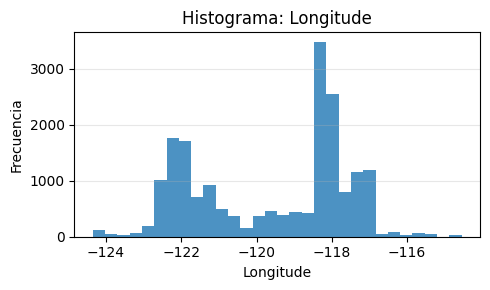

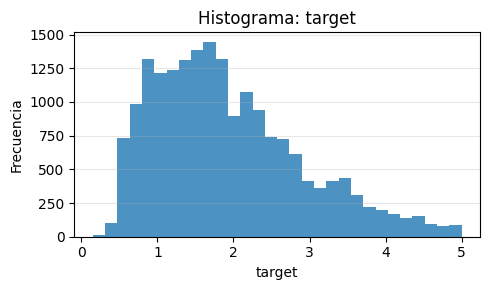

In [6]:
for col in num_cols:
    plt.figure(figsize=(5,3))
    df[col].plot(kind="hist", bins=30, alpha=0.8)
    plt.title(f"Histograma: {col}")
    plt.xlabel(col); plt.ylabel("Frecuencia"); plt.grid(True, axis="y", alpha=0.3)
    plt.tight_layout()
    plt.plot()

### Analisis bivariante: Visualización de las correlaciones - Matriz de correlación (Pearson)
Parametros disponibles:

 - `df.corr(method='pearson')` # por defecto
 - `df.corr(method='spearman')`
 - `df.corr(method='kendall')`

Modo simple:

In [7]:
df.corr(method='spearman')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.179968,0.640821,-0.280825,0.032003,-0.026157,-0.082796,-0.000087,0.651408
HouseAge,-0.179968,1.000000,-0.240432,-0.101889,-0.296756,-0.010575,0.028090,-0.140461,0.052431
AveRooms,0.640821,-0.240432,1.000000,0.038244,-0.074179,0.038431,0.138707,-0.053081,0.228595
AveBedrms,-0.280825,-0.101889,0.038244,1.000000,0.049561,-0.115945,0.048770,-0.006053,-0.140855
Population,0.032003,-0.296756,-0.074179,0.049561,1.000000,0.235069,-0.120479,0.124991,0.030610
AveOccup,-0.026157,-0.010575,0.038431,-0.115945,0.235069,1.000000,-0.166131,0.192029,-0.242458
Latitude,-0.082796,0.028090,0.138707,0.048770,-0.120479,-0.166131,1.000000,-0.883688,-0.164956
Longitude,-0.000087,-0.140461,-0.053081,-0.006053,0.124991,0.192029,-0.883688,1.000000,-0.061985
target,0.651408,0.052431,0.228595,-0.140855,0.030610,-0.242458,-0.164956,-0.061985,1.000000


Modo visual con seaborn:

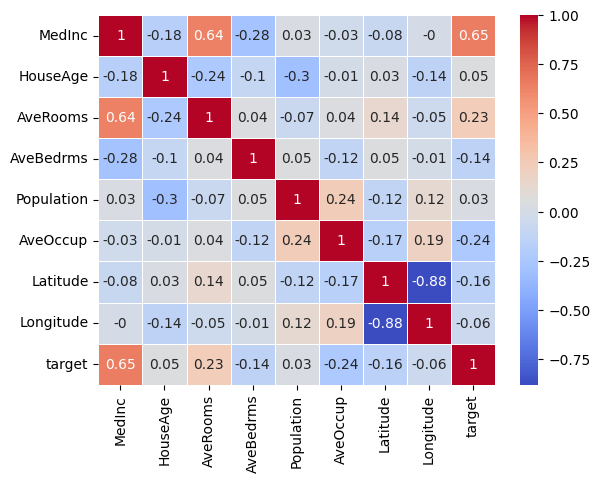

In [8]:
corr = df.corr(method='spearman').round(2)
ax = sns.heatmap(corr, cmap="coolwarm", annot=True, linewidths=.5)

Este gráfico nos sirve para identificar la multicolinealidad entre variables. Por ejemplo, AveRooms (Habitaciones)y AveBedrms (Dormitorios) tiene una correlacion del 0.84, por tanto, podriamos prescindir de una ellas para nuestro modelo.

### Analisis visual bivariante

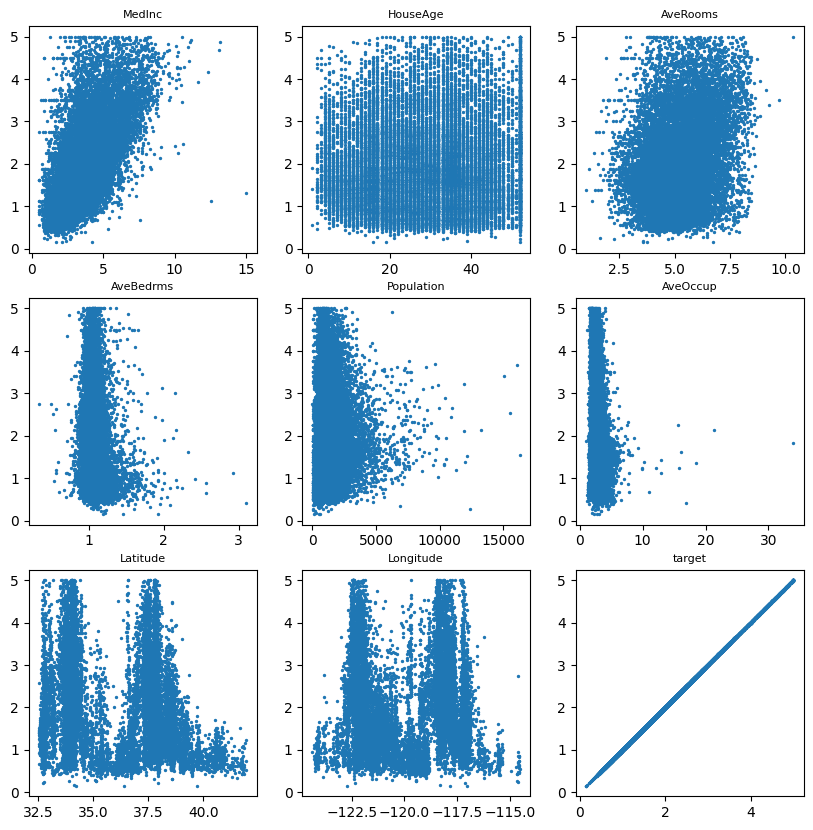

In [9]:
plt.figure(figsize=(10,10))
for index, columns in enumerate(df.columns[:9]):
    plt.subplot(331+index)
    plt.scatter(df[columns], target, s=2) 
    plt.title(columns, fontsize=8)
plt.show()

Se aprecian varias variables explicativas que pueden predecir el precio de una vivienda, la más llamativa sería los ingresos de la zona (MedInc), y el número de habitaciones (AveRooms), donde se aprecia visualmente que a mayores ingresos medios y mayor numero de habitaciones mayor precio.

In [10]:
# Para ordenar aquellas variables con mayor correlación
df.corr(method='pearson')['target'].sort_values(ascending=False)

target        1.000000
MedInc        0.641939
AveRooms      0.254734
HouseAge      0.076514
Population    0.009030
Longitude    -0.047310
AveBedrms    -0.130407
Latitude     -0.146458
AveOccup     -0.237352
Name: target, dtype: float64

In [79]:
df = df[['MedInc', 'AveRooms', 'AveOccup','Latitude','target']]
df.head()

,MedInc,AveRooms,AveOccup,Latitude,target
0,8.3252,6.984127,2.555556,37.88,4.526
1,8.3014,6.238137,2.109842,37.86,3.585
2,7.2574,8.288136,2.802260,37.85,3.521
3,5.6431,5.817352,2.547945,37.85,3.413
4,3.8462,6.281853,2.181467,37.85,3.422
